# Import Libraries

In [2]:
#import libraries
import numpy as np
import pandas as pd

# Data Loading

In [3]:
df = pd.read_csv("D:/CAPSTONE_PROJECT/capstone-project-Namtanga/data/tanzania_climate_data.csv")

In [4]:
df

,Year,Month,Average_Temperature_C,Total_Rainfall_mm,Max_Temperature_C,Min_Temperature_C
0,2000,1,26.1,19.8,32.0,21.9
1,2000,2,25.8,87.3,29.5,22.7
2,2000,3,26.8,266.5,29.9,21.8
3,2000,4,26.3,136.7,30.1,22.9
4,2000,5,26.0,63.1,30.7,22.4
...,...,...,...,...,...,...
247,2020,8,26.1,43.2,30.5,21.6
248,2020,9,26.6,78.0,33.1,21.7
249,2020,10,25.2,75.1,29.9,21.4
250,2020,11,25.1,159.3,29.5,21.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   252 non-null    int64  
 1   Month                  252 non-null    int64  
 2   Average_Temperature_C  252 non-null    float64
 3   Total_Rainfall_mm      252 non-null    float64
 4   Max_Temperature_C      252 non-null    float64
 5   Min_Temperature_C      252 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 11.9 KB


# Data Preprocessing

In [6]:
# Step 1: Handle Missing Values
# Fill missing numerical values with the median
numerical_columns = ['Average_Temperature_C', 'Total_Rainfall_mm', 'Max_Temperature_C', 'Min_Temperature_C'] 
for col in numerical_columns:
    df[col].fillna(df[col].median())

# Step 2: Feature Engineering
# Extract seasonal trends from Year and Month
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] 
                                 else 'Spring' if x in [3, 4, 5]
                                 else 'Summer' if x in [6, 7, 8]
                                 else 'Autumn')

# Calculate temperature range (Max_Temperature_C - Min_Temperature_C)
df['Temperature_Range_C'] = df['Max_Temperature_C'] - df['Min_Temperature_C']

# Calculate average rainfall grouped by Year or Month
df['Average_Rainfall_mm'] = df.groupby(['Year', 'Month'])['Total_Rainfall_mm'].transform('mean')

# Step 3: Encoding Categorical Variables
# One-hot encoding for the 'Season' column
df = pd.get_dummies(df, columns=['Season'], drop_first=True)

# Output the cleaned dataset
# Save the cleaned dataset for further analysis
df.to_csv('D:/CAPSTONE_PROJECT/capstone-project-Namtanga/data/tanzania_climate_data_cleaned_dataset.csv', index=False)

print("Data cleaning and feature engineering completed. Cleaned dataset saved as 'D:/CAPSTONE_PROJECT/capstone-project-Namtanga/data/tanzania_climate_data_cleaned_dataset.csv'.")

Data cleaning and feature engineering completed. Cleaned dataset saved as 'D:/CAPSTONE_PROJECT/capstone-project-Namtanga/data/tanzania_climate_data_cleaned_dataset.csv'.


In [7]:
!pip install statsmodels

In [8]:
!pip install --upgrade pip

# Exploratory Data Analysis (EDA)

Statistical Summaries:
        Average_Temperature_C  Total_Rainfall_mm  Max_Temperature_C  \
mean                25.707540         100.363889          30.576587   
median              25.700000          72.200000          30.500000   
var                  0.292732        6477.849169           1.670645   

        Min_Temperature_C  
mean            21.698016  
median          21.700000  
var              0.628960  


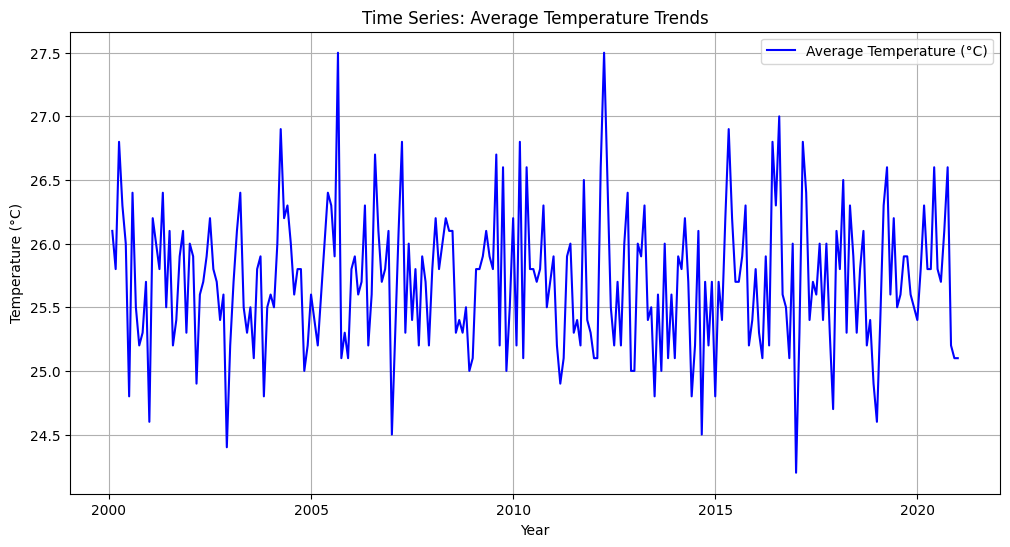

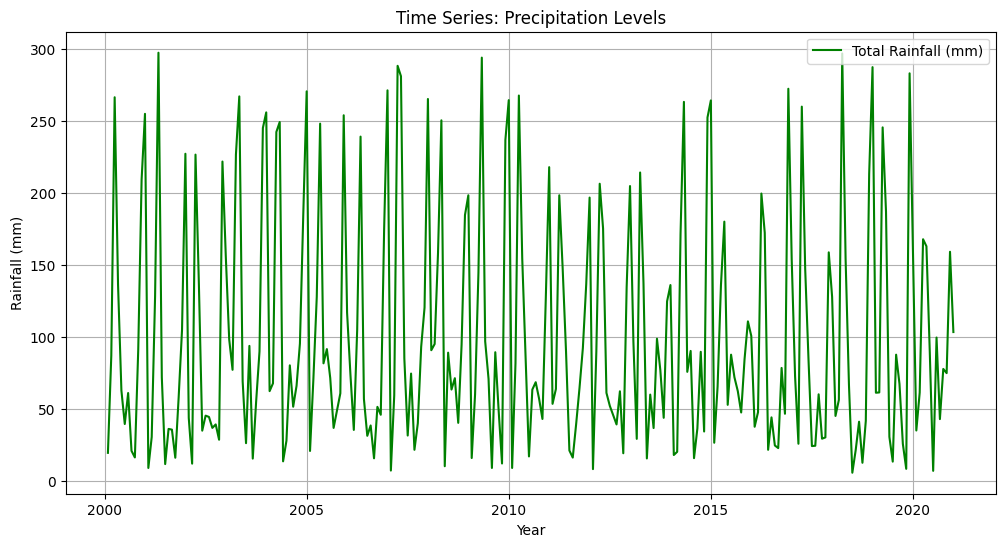

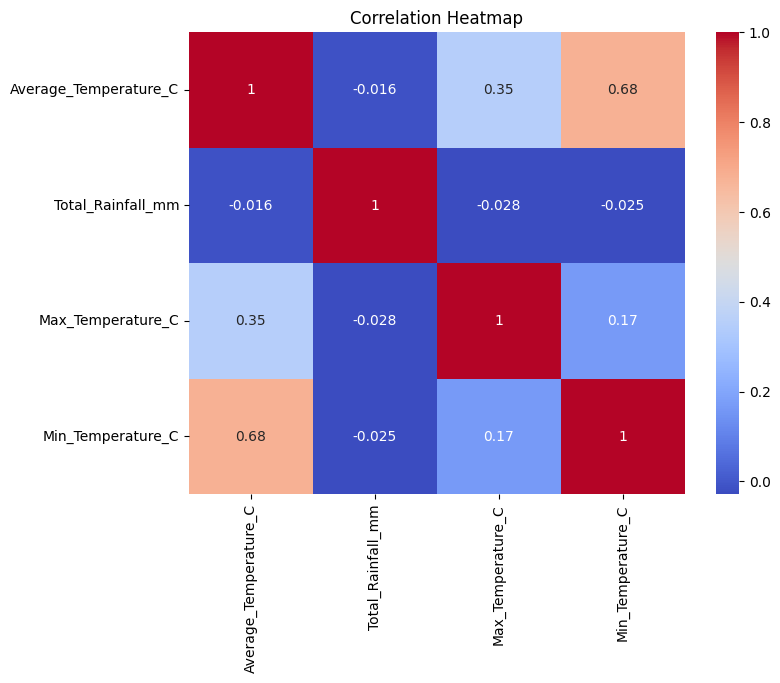

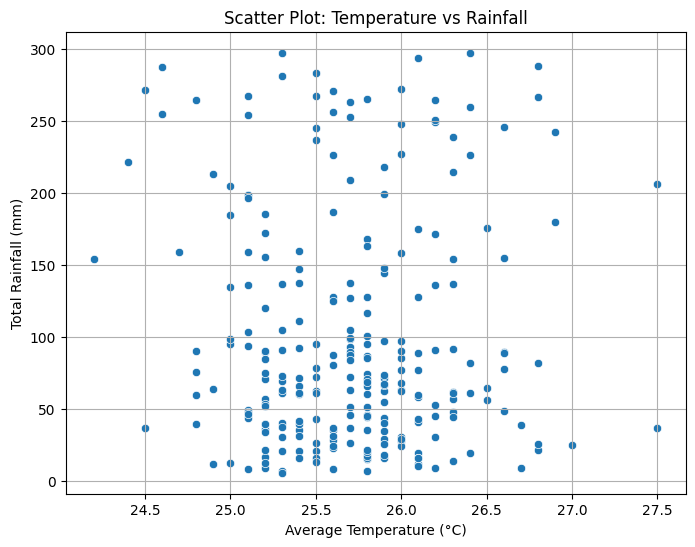

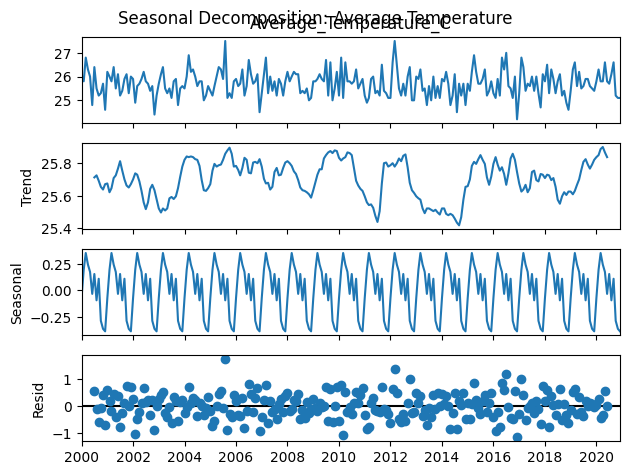

Summary statistics saved to D:/CAPSTONE_PROJECT/capstone-project-Namtanga/data/summary_statistics.csv


In [9]:
# PD
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# # Load the cleaned dataset
# # file_path = 'D:/CAPSTONE_PROJECT/capstone-project-Namtanga/data/cleaned_dataset.csv'
# df = pd.read_csv(file_path)

# Step 1: Statistical Summaries
# Compute mean, median, variance for relevant columns
summary_statistics = df[['Average_Temperature_C', 'Total_Rainfall_mm', 'Max_Temperature_C', 'Min_Temperature_C']].agg(['mean', 'median', 'var'])
print("Statistical Summaries:")
print(summary_statistics)

# Step 2: Data Visualization
# Time series of temperature trends
plt.figure(figsize=(12, 6))
plt.plot(df['Year'] + df['Month'] / 12, df['Average_Temperature_C'], label='Average Temperature (°C)', color='b')
plt.title('Time Series: Average Temperature Trends')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.legend()
plt.savefig('temperature_trends.png')
plt.show()

# Time series of precipitation levels
plt.figure(figsize=(12, 6))
plt.plot(df['Year'] + df['Month'] / 12, df['Total_Rainfall_mm'], label='Total Rainfall (mm)', color='g')
plt.title('Time Series: Precipitation Levels')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.grid()
plt.legend()
plt.savefig('precipitation_trends.png')
plt.show()

# Step 3: Correlation Analysis
# Heatmap of correlations
correlation_matrix = df[['Average_Temperature_C', 'Total_Rainfall_mm', 'Max_Temperature_C', 'Min_Temperature_C']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

# Scatter plot: Temperature vs Rainfall
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average_Temperature_C', y='Total_Rainfall_mm', data=df)
plt.title('Scatter Plot: Temperature vs Rainfall')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Total Rainfall (mm)')
plt.grid()
plt.savefig('scatter_temperature_rainfall.png')
plt.show()

# Step 4: Seasonal Decomposition
# Perform seasonal decomposition on temperature (use monthly data)
df['YearMonth'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))
df.set_index('YearMonth', inplace=True)
result = seasonal_decompose(df['Average_Temperature_C'], model='additive', period=12)

# Visualize seasonal decomposition
result.plot()
plt.suptitle('Seasonal Decomposition: Average Temperature')
plt.savefig('seasonal_decomposition_temperature.png')
plt.show()

# Save the analysis outputs
output_summary_path = 'D:/CAPSTONE_PROJECT/capstone-project-Namtanga/data/summary_statistics.csv'
summary_statistics.to_csv(output_summary_path)
print(f"Summary statistics saved to {output_summary_path}")

# Machine Learning Model Development  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib

# Step 1: Load the dataset
file_path = 'D:/CAPSTONE_PROJECT/capstone-project-Namtanga/data/tanzania_climate_data_cleaned_dataset.csv'
df = pd.read_csv(file_path)

# Define features (X) and target variable (y)
# Replace 'Target_Column' with the actual column name to predict (e.g., 'Average_Temperature_C')
X = df.drop(columns=['Average_Temperature_C'])  # Features
y = df['Average_Temperature_C']  # Target variable

# Step 2: Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Models
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Random Forest
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Step 4: Evaluate Models
# Linear Regression Evaluation
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print(f"Linear Regression - RMSE: {rmse_linear:.2f}, MAE: {mae_linear:.2f}")

# Random Forest Evaluation
y_pred_rf = random_forest_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest - RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}")

# Step 5: Save the Best Performing Model
if rmse_rf < rmse_linear:
    best_model = random_forest_model
    model_name = 'random_forest_model.pkl'
else:
    best_model = linear_model
    model_name = 'linear_model.pkl'

model_path = f'D:/CAPSTONE_PROJECT/capstone-project-Namtanga/data/{model_name}'
joblib.dump(best_model, model_path)
print(f"Best performing model saved as {model_name} at {model_path}")

# Streamlit Deployment

In [19]:
# import streamlit as st
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import joblib
# import numpy as np

# # Set up the Streamlit app
# st.set_page_config(page_title="Climate Prediction App", layout="wide")

# # Load data and models
# data_path = 'data/tanzania_climate_data_cleaned_dataset.csv'
# model_path = 'linear_model.pkl'
# data = pd.read_csv(data_path)
# model = joblib.load(model_path)

# # Title and description
# st.title("Climate Prediction App")
# st.markdown("""
# This interactive app allows you to explore climate trends and make predictions for future conditions in Tanzania.
# You can visualize historical data, analyze trends, and input parameters for real-time predictions.
# """)

# # Sidebar for user input
# st.sidebar.header("User Input Parameters")
# year = st.sidebar.slider("Year", int(data['Year'].min()), int(data['Year'].max() + 10), int(data['Year'].min()))
# month = st.sidebar.selectbox("Month", list(range(1, 13)))
# rainfall = st.sidebar.number_input("Total Rainfall (mm)", float(data['Total_Rainfall_mm'].min()), float(data['Total_Rainfall_mm'].max()), float(data['Total_Rainfall_mm'].mean()))
# max_temp = st.sidebar.number_input("Max Temperature (°C)", float(data['Max_Temperature_C'].min()), float(data['Max_Temperature_C'].max()), float(data['Max_Temperature_C'].mean()))
# min_temp = st.sidebar.number_input("Min Temperature (°C)", float(data['Min_Temperature_C'].min()), float(data['Min_Temperature_C'].max()), float(data['Min_Temperature_C'].mean()))

# # Prepare input for prediction
# input_data = pd.DataFrame({
#     'Year': [year],
#     'Month': [month],
#     'Total_Rainfall_mm': [rainfall],
#     'Max_Temperature_C': [max_temp],
#     'Min_Temperature_C': [min_temp]
# })

# # Align input_data columns with the model's expected feature names
# expected_features = model.feature_names_in_  # Features the model expects
# input_data_aligned = input_data.reindex(columns=expected_features, fill_value=0)

# # Prediction
# st.sidebar.subheader("Prediction")
# if st.sidebar.button("Predict"):
#     try:
#         prediction = model.predict(input_data_aligned)[0]
#         st.sidebar.write(f"Predicted Average Temperature (°C): {prediction:.2f}")
#     except Exception as e:
#         st.sidebar.error(f"Error during prediction: {e}")

# # Main Page - Visualizations
# st.header("Exploratory Data Analysis")

# # Time Series Plot
# st.subheader("Temperature Trends Over Time")
# fig, ax = plt.subplots(figsize=(10, 5))
# ax.plot(data['Year'] + data['Month'] / 12, data['Average_Temperature_C'], label="Avg Temp (°C)", color="blue")
# ax.set_title("Average Temperature Over Time")
# ax.set_xlabel("Year")
# ax.set_ylabel("Temperature (°C)")
# ax.legend()
# st.pyplot(fig)

# # Correlation Heatmap
# st.subheader("Correlation Heatmap")
# fig, ax = plt.subplots(figsize=(8, 6))
# correlation_matrix = data[['Average_Temperature_C', 'Total_Rainfall_mm', 'Max_Temperature_C', 'Min_Temperature_C']].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)
# st.pyplot(fig)

# # Scatter Plot: Temperature vs Rainfall
# st.subheader("Scatter Plot: Temperature vs Rainfall")
# fig, ax = plt.subplots(figsize=(8, 6))
# sns.scatterplot(x='Average_Temperature_C', y='Total_Rainfall_mm', data=data, ax=ax)
# ax.set_title("Temperature vs Rainfall")
# ax.set_xlabel("Average Temperature (°C)")
# ax.set_ylabel("Total Rainfall (mm)")
# st.pyplot(fig)

# # Seasonal Decomposition Visualization
# st.subheader("Seasonal Patterns in Temperature")
# data['YearMonth'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str))
# data.set_index('YearMonth', inplace=True)
# from statsmodels.tsa.seasonal import seasonal_decompose
# result = seasonal_decompose(data['Average_Temperature_C'], model='additive', period=12)
# result.plot()
# st.pyplot(plt)


In [16]:
!pip install streamlit